<center>     
    <h1>Income Prediction Project</h1>
</center>


## Project Introduction


    In this project, we aim to harness the predictive power of machine learning to determine if an individual's income exceeds $50,000 per year, based on a comprehensive dataset derived from census information. This endeavor involves meticulous exploration and analysis of the data, feature engineering, and the development of a robust model capable of making accurate predictions. Through this analysis, we will uncover significant patterns and trends that influence income levels, thereby providing valuable insights into economic factors and aiding in better socio-economic planning and decision-making.

## Installed missising libaries

In [2]:
!pip install seaborn
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 609.7 kB/s eta 0:00:00m eta 0:00:010:00:04


## Imported libaries

In [1]:
# import necessary libaries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error,roc_curve, r2_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# plt.style.use('ggplot')

# setting style
# style.available
#style.use('ggplot')

## 1. Data Collection and Initial Inspection

### 1.1 Loading the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("income_data.csv")

# Initail inspection
df.head(12)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### 1.2 Basic Statistics and Data Types

In [3]:
# Get numbers of records and variables
num_records, num_variables = df.shape

# Print the number of records and variables in the dataset
print(f"Number of records: {num_records}, Number of variables: {num_variables}\n")

# Get dataset information
df.info()

Number of records: 48842, Number of variables: 15

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# Summary statistics
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Check for null values
null_values = df.isnull().sum()

# Check for duplicate records
duplicate_records = df.duplicated().sum()

# Print null values and duplicate records
print(f'Number of null values: \n{null_values}')

print()

print(f'Number of duplicated records: {duplicate_records}')

Number of null values: 
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Number of duplicated records: 48


### Comments:

- We start by loading the dataset and inspecting it to understand the features and the structure.
- `df.shape` gives us the shape of the dataset such as the `rows`(number of records) and `columns`(number of variables)
- `df.info()` gives us the number of rows, columns, data types, and memory usage.
- `df.describe()` provides a summary of the numerical columns.
- `df.isnull().sum()` checks for missing values represented by null values
- `df.duplicated().sum()` checks for duplicate records

In the dataset, the columns "workclass," "occupation," and "native.country" have some values of "?". This can be handled by filling in the missing values for the '?' fields with the mode of the appropriate columns.

## 2. Data Cleaning

- #### Handling missing values

In [6]:
df.replace('?', np.nan, inplace=True)

# Fill missing values in 'workclass' column with mode
mode_workclass = df['workclass'].mode()[0]
df['workclass'].fillna(mode_workclass, inplace=True)

# Fill missing values in 'occupation' column with mode
mode_occupation = df['occupation'].mode()[0]
df['occupation'].fillna(mode_occupation, inplace=True)

# Fill missing values in 'native.country' column with mode
mode_native_country = df['native-country'].mode()[0]
df['native-country'].fillna(mode_native_country, inplace=True)

In [7]:
# Check for missing values again
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
# Drop unnecessary columns
df.drop(['fnlwgt'], axis=1, inplace=True)


In [9]:
df_numeric = df.select_dtypes(include = 'int64', exclude = 'object')
df_numeric.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [10]:
df_cat = df.select_dtypes(include = 'object', exclude = 'int64')
df_cat.head() 

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


## 3. Exploratory Data Analysis (EDA)

- #### Univariate Analysis

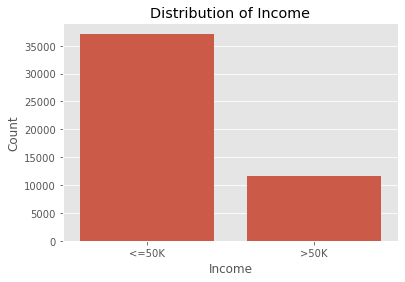

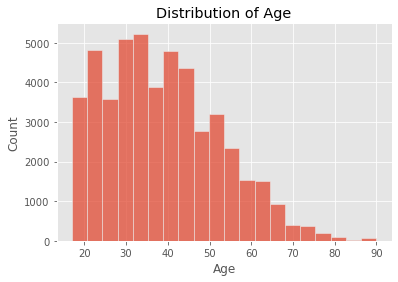

In [223]:
# Distribution of income
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Distribution of age
sns.histplot(df['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


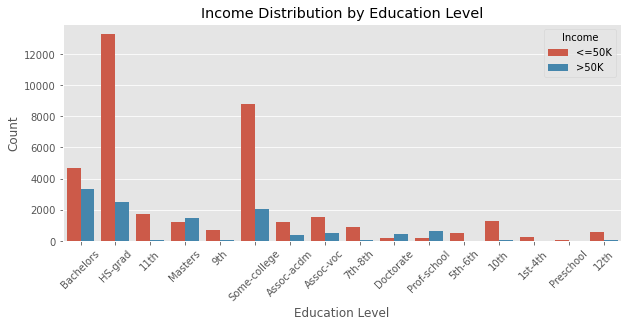

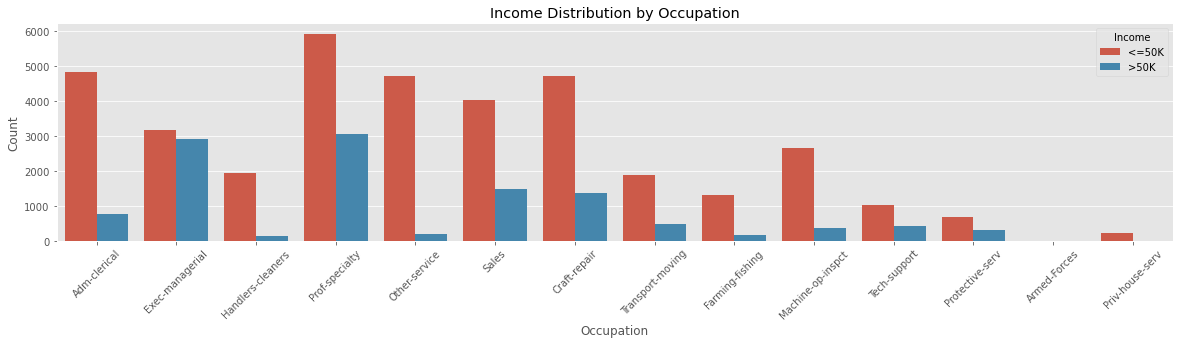

In [224]:
# Dstribution by education level
plt.figure(figsize=(10, 4))
sns.countplot(x='education', hue='income', data=df)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

# Distribution by occupation
plt.figure(figsize=(20, 4))
sns.countplot(x='occupation', hue='income', data=df)
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

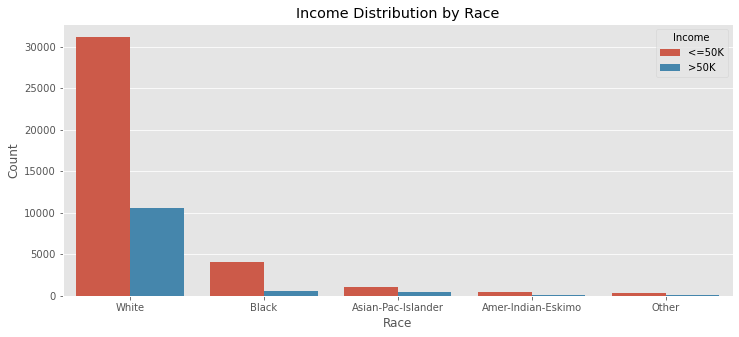

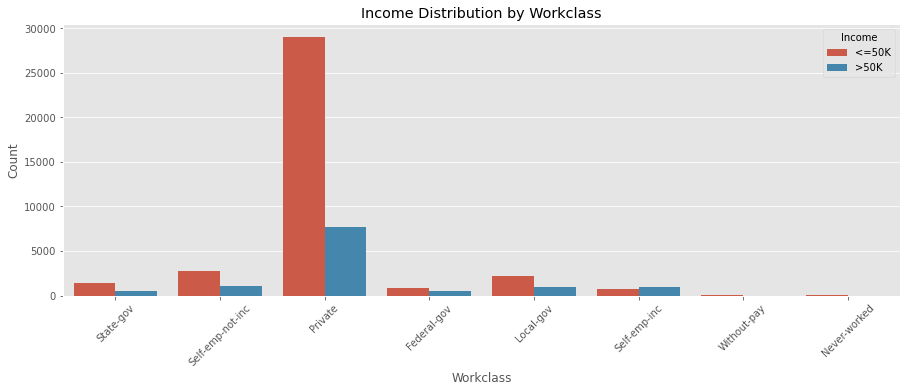

In [225]:
# Income distribution by race
plt.figure(figsize=(12, 5))
sns.countplot(x='race', hue='income', data=df)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.show()


# Income distribution by workclass
plt.figure(figsize=(15, 5))
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

- #### Bivariate Analysis

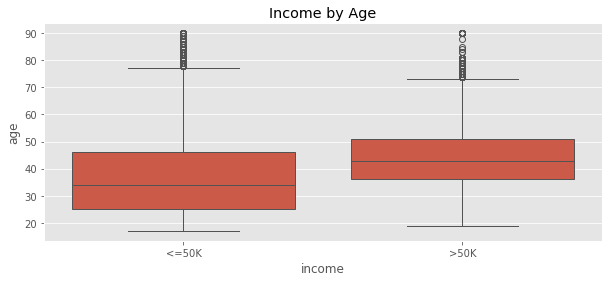

In [226]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='income', y='age', data=df)
plt.title('Income by Age')
plt.show()



- #### Multivariate Analysis(Correlation Matrix)

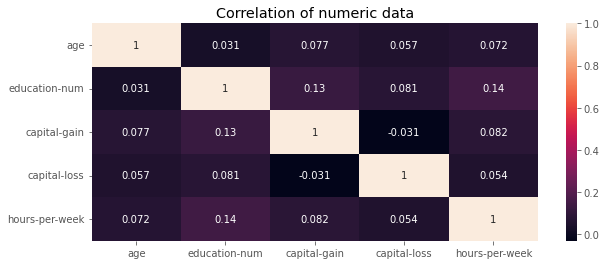

In [227]:
# Visualize correlation matrix for numerical features
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation of numeric data')
plt.show()

## 4. Data Preprocessing

In [11]:
# Converting the target variable 'income' to binary 0/1
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df['income'].head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [12]:
# Splitting the data
X = df.drop(['income'], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


In [13]:
# Converting categorical variables to numerical variables using LabelEncoder()
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [14]:
# Scale the data using StandardScaler()
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [15]:
X_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-1.140944,-0.090676,1.217972,-0.033090,0.915864,-0.041854,-0.274172,0.394517,0.701197,-0.145295,-0.218186,-0.035207,0.259509
1,-0.556831,-0.090676,0.183523,-0.423107,-0.412060,-0.041854,-0.899550,0.394517,0.701197,-0.145295,-0.218186,0.369771,0.259509
2,0.392353,-0.090676,-2.402599,-1.203141,-1.739984,0.713275,-0.274172,-1.948182,-1.426132,-0.145295,-0.218186,-0.035207,0.259509
3,0.465367,-0.090676,-0.333701,1.136962,0.915864,0.713275,-0.274172,0.394517,0.701197,-0.145295,-0.218186,-0.035207,0.259509
4,0.757424,1.705522,-0.333701,1.136962,-0.412060,-0.545273,-0.899550,0.394517,0.701197,-0.145295,-0.218186,2.394662,0.259509


## 5. Model Development (Training, Optimization and Evaluation)

### Logistic Regression ###
Accuracy: 0.8244
Precision: 0.6997
Recall: 0.4427
F1 Score: 0.5423
ROC AUC Score: 0.6922
-----------------------------
Reports:

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7474
           1       0.70      0.44      0.54      2295

    accuracy                           0.82      9769
   macro avg       0.77      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

### Decision Tree ###
Accuracy: 0.8166
Precision: 0.6124
Recall: 0.5969
F1 Score: 0.6046
ROC AUC Score: 0.7405
-----------------------------
Reports:

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7474
           1       0.61      0.60      0.60      2295

    accuracy                           0.82      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.82      0.82      9769

### K-Nearest Neighbors ###
Accuracy: 

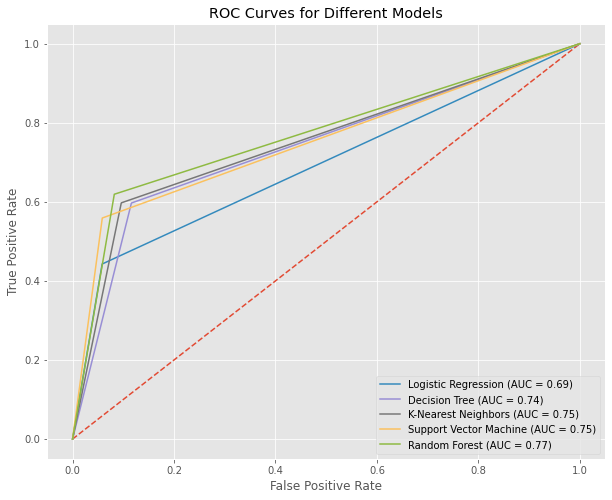

In [237]:
# Define a function to train and evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print the evaluation report
    print(f"==========================")
    print(f"### {model_name} ###")
    print(f"==========================")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"-----------------------------")
    print("Reports:\n")
    print(classification_report(y_test, y_pred))
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Loop over models and evaluate each
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for comparison

for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test, model_name)

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

- #### Model Opitimization

---------------------------
Tuning Logistic Regression...
---------------------------
### Logistic Regression ###
Best Hyperparameters: {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
Best cross-validation score: 0.83
Accuracy: 0.8244
Precision: 0.6997
Recall: 0.4427
F1 Score: 0.5423
ROC AUC Score: 0.8487
-----------------------------
Report:

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7474
           1       0.70      0.44      0.54      2295

    accuracy                           0.82      9769
   macro avg       0.77      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



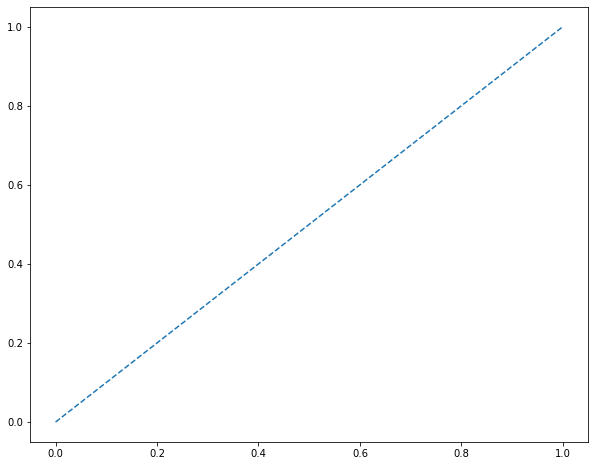

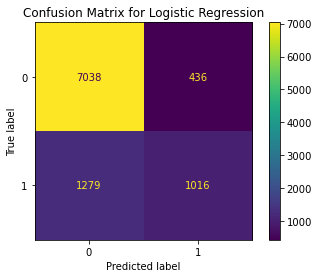

---------------------------
Tuning Decision Tree...
---------------------------
### Decision Tree ###
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 20}
Best cross-validation score: 0.86
Accuracy: 0.8566
Precision: 0.7639
Recall: 0.5638
F1 Score: 0.6488
ROC AUC Score: 0.9032
-----------------------------
Report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7474
           1       0.76      0.56      0.65      2295

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769



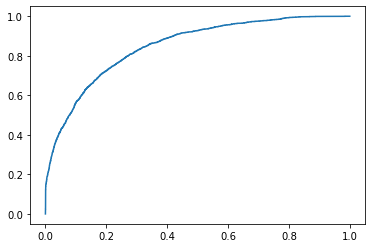

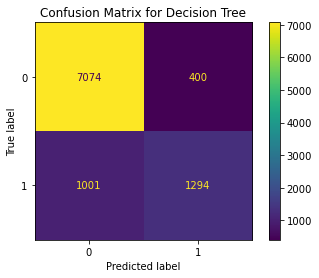

---------------------------
Tuning K-Nearest Neighbors...
---------------------------
### K-Nearest Neighbors ###
Best Hyperparameters: {'n_neighbors': 9}
Best cross-validation score: 0.84
Accuracy: 0.8355
Precision: 0.6734
Recall: 0.5821
F1 Score: 0.6244
ROC AUC Score: 0.8711
-----------------------------
Report:

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7474
           1       0.67      0.58      0.62      2295

    accuracy                           0.84      9769
   macro avg       0.78      0.75      0.76      9769
weighted avg       0.83      0.84      0.83      9769



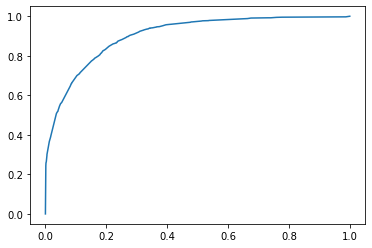

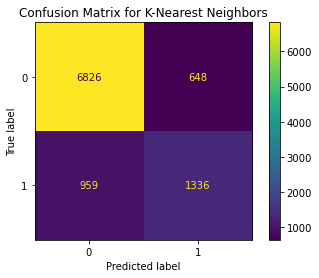

---------------------------
Tuning Support Vector Machine...
---------------------------
### Support Vector Machine ###
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score: 0.85
Accuracy: 0.8513
Precision: 0.7414
Recall: 0.5634
F1 Score: 0.6403
ROC AUC Score: 0.8798
-----------------------------
Report:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7474
           1       0.74      0.56      0.64      2295

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



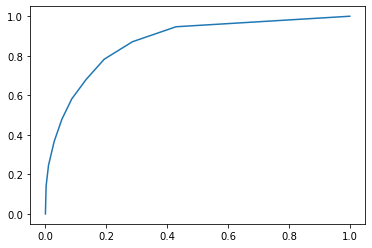

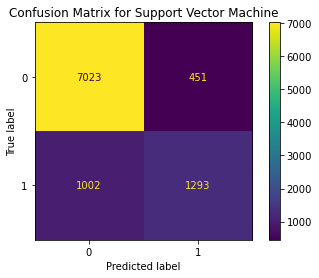

---------------------------
Tuning Random Forest...
---------------------------
### Random Forest ###
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}
Best cross-validation score: 0.86
Accuracy: 0.8613
Precision: 0.7503
Recall: 0.6139
F1 Score: 0.6753
ROC AUC Score: 0.9133
-----------------------------
Report:

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7474
           1       0.75      0.61      0.68      2295

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.79      9769
weighted avg       0.86      0.86      0.86      9769



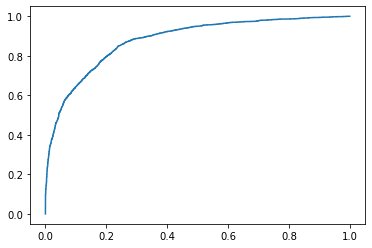

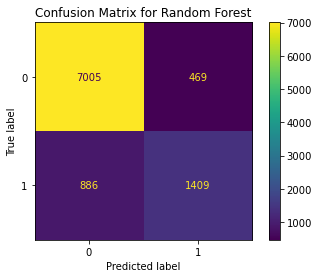

---------------------------
Tuning XGBoost...
---------------------------


/home/vince/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:27:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vince/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:27:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vince/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:27:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vince/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:27:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vince/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:27:33] WARNING: /workspace/src/lea

### XGBoost ###
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best cross-validation score: 0.88
Accuracy: 0.8690
Precision: 0.7612
Recall: 0.6444
F1 Score: 0.6980
ROC AUC Score: 0.9259
-----------------------------
Report:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7474
           1       0.76      0.64      0.70      2295

    accuracy                           0.87      9769
   macro avg       0.83      0.79      0.81      9769
weighted avg       0.86      0.87      0.87      9769



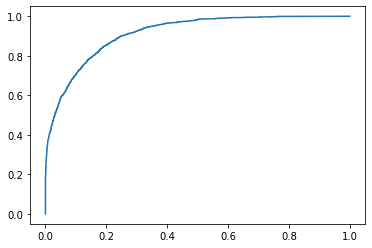

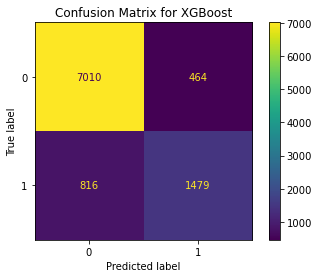

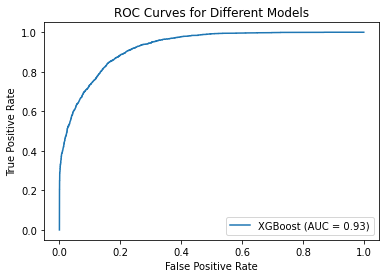

In [16]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [100, 200, 300]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Define a function to train, optimize, and evaluate the model
def evaluate_model_with_optimization(model, param_grid, X_train, y_train, X_test, y_test, model_name):
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model after tuning
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])  # Use predict_proba for ROC AUC
    
    # Print evaluation report
    print(f"==========================")
    print(f"### {model_name} ###")
    print(f"==========================")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.2f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"-----------------------------")
    print("Report:\n")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for comparison in ROC curves
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], linestyle='--')

# Loop over models and evaluate each with optimization
for model_name, model in models.items():
    print("---------------------------")
    print(f"Tuning {model_name}...")
    print("---------------------------")
    param_grid = param_grids[model_name]
    evaluate_model_with_optimization(model, param_grid, X_train, y_train, X_test, y_test, model_name)

# Add labels and legend for ROC curves
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

## Saving the Model Using Pickle

In [240]:
import pickle

with open('income_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)


## Summary and Recommendations



- #### Key Insights from the EDA
The exploratory data analysis (EDA) revealed distinct patterns and trends across different demographic groups concerning income levels. It highlighted the significant influence of education, age, and hours worked per week on income, with higher education levels and more hours worked correlating with higher income levels.

- #### Performance of Machine Learning Models
The `Logistic Regression`, `Decision Tree`, `K-Nearest Neighbors`, `Support Vector Machine`, and `Random Forest` models were evaluated. The `Random Forest model` exhibited the best performance with an `accuracy` of `0.8613`, a `precision` of `0.7503`, a `recall` of 0.6139, and an `F1 score` of `0.6753`. Despite these strong results, there's room for improvement, particularly in enhancing the recall to better identify lower-income earners.

- #### Recommendations
To improve the models further:
1. **Data Enrichment:** Incorporate additional features that may impact income, such as job industry and marital status.
2. **Feature Engineering:** Experiment with polynomial and interaction features to capture complex relationships within the data.
3. **Advanced Model Tuning:** Utilize more sophisticated hyperparameter tuning methods like Bayesian optimization to fine-tune the models.
4. **Ensemble Techniques:** Explore stacking various models to improve prediction accuracy and robustness. 

By addressing these areas, the predictive accuracy and overall performance of the models can be enhanced, providing more nuanced insights into income level predictions.